In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('waste_recycle.csv')

print("Initial Data:")
print(df.head())



Initial Data:
   Unnamed: 0          city  recyclable_waste  non_recyclable_waste  \
0           0     Twin Peak              3146                 17707   
1           1       Pandora             12022                 43248   
2           2  Central City             28205                  5157   
3           3      Oakhoven             28200                 49946   
4           4    Metropolis              2564                 96306   

   population  collection_efficiency  
0      213174                  84.01  
1      486956                  85.33  
2      381698                  85.47  
3      883851                  69.09  
4      969115                  71.40  


In [3]:
df['total_waste'] = df['recyclable_waste'] + df['non_recyclable_waste']
df['per_capita_waste'] = df['total_waste'] / df['population']

print(df[['city', 'per_capita_waste']])


           city  per_capita_waste
0     Twin Peak          0.097821
1       Pandora          0.113501
2  Central City          0.087404
3      Oakhoven          0.088415
4    Metropolis          0.102021


In [4]:
df['recycling_rate'] = df['recyclable_waste'] / df['total_waste']

# Sort cities by recycling rate for comparison
recycling_comparison = df[['city', 'recycling_rate']].sort_values(by='recycling_rate', ascending=False)
print(recycling_comparison)


           city  recycling_rate
2  Central City        0.845423
3      Oakhoven        0.360863
1       Pandora        0.217514
0     Twin Peak        0.150866
4    Metropolis        0.025933


In [5]:
df['population'] = df['population'].fillna(method='ffill')
print(df['population'].isnull().sum())  # Check if missing values remain


0


/tmp/ipython-input-3167280504.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['population'] = df['population'].fillna(method='ffill')


In [6]:
median_efficiency = df['collection_efficiency'].median()
df['collection_efficiency'] = df['collection_efficiency'].fillna(median_efficiency)

# Correlation between collection_efficiency and total_waste
correlation = df['collection_efficiency'].corr(df['total_waste'])
print(f"Correlation between collection efficiency and total waste: {correlation}")


Correlation between collection efficiency and total waste: -0.8438722329972255


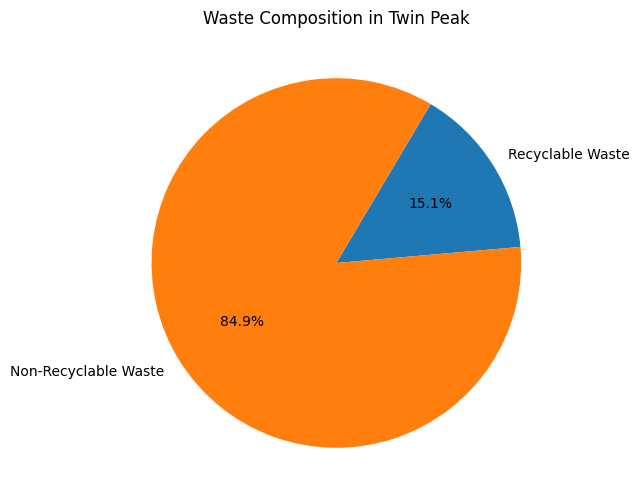

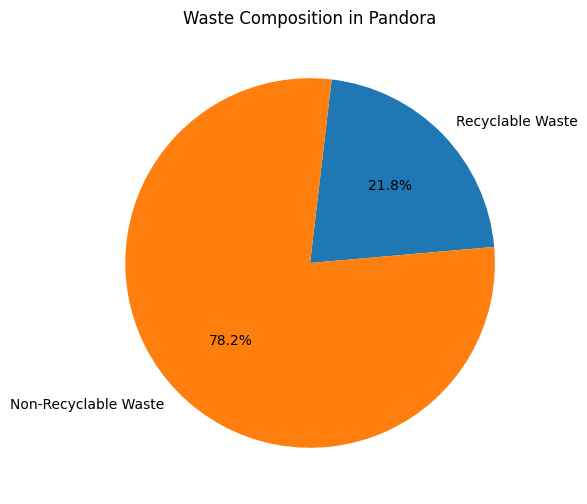

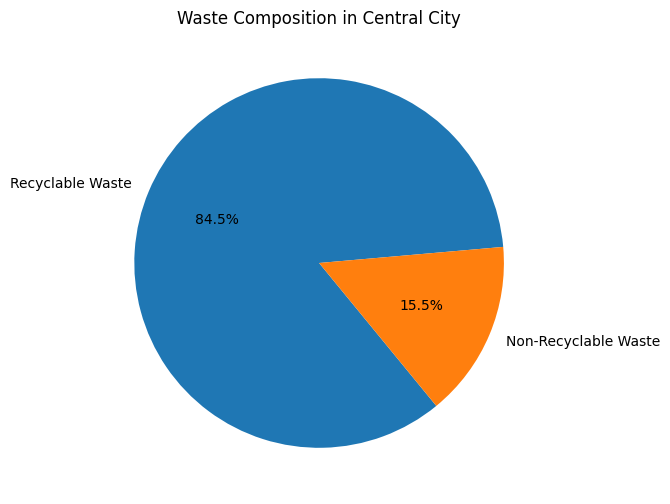

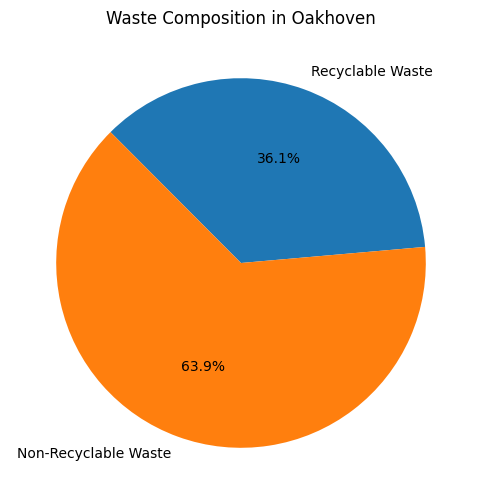

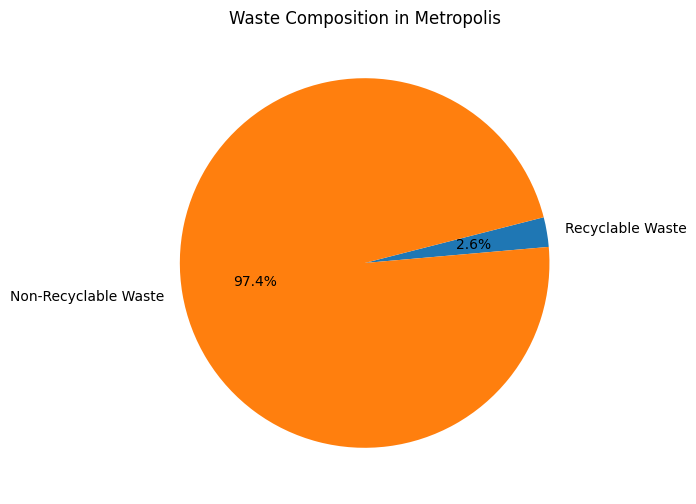

In [7]:

cities_to_plot = df['city'].unique()[:5]

for city in cities_to_plot:
    city_data = df[df['city'] == city]
    labels = ['Recyclable Waste', 'Non-Recyclable Waste']
    sizes = [city_data['recyclable_waste'].values[0], city_data['non_recyclable_waste'].values[0]]

    plt.figure(figsize=(6,6))
    plt.title(f'Waste Composition in {city}')
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=5)
    plt.show()


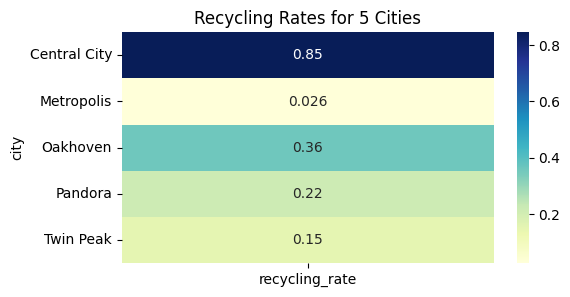

In [8]:
# Select first 5 cities
cities_to_plot = df['city'].unique()[:5]

pivot = df[df['city'].isin(cities_to_plot)].pivot_table(index='city', values='recycling_rate')

plt.figure(figsize=(6, 3))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Recycling Rates for 5 Cities')
plt.show()

